# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [14]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Importation de la librairie plotly express
import plotly as ptly

In [18]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium

<p> L'instruction permettant ceci est : df.columns</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [22]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [26]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [28]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_erp.dtypes
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.count()

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64

In [30]:
#Afficher les 5 premières lignes de la table
df_erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [32]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
df_erp[df_erp["product_id"].duplicated()]
df_erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
purchase_price    0
dtype: int64

In [34]:
#Afficher les valeurs distinctes de la colonne stock_status
df_erp['stock_status'].unique()
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# la colone product_id , onsale_web, stock_quantity

array(['instock', 'outofstock'], dtype=object)

In [36]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2']= df_erp["stock_quantity"].apply( lambda x: "instock" if x > 0 else "outofstock" )

df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock


In [38]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
compare = df_erp["stock_status"] == df_erp["stock_status_2"]
compare

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [40]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
compare.sum()
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

823

In [42]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[compare == False]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [44]:
#Corriger la ou les données incohérentes
df_erp.loc[df_erp["product_id"]==4039,"stock_status"]="instock"
df_erp.loc[df_erp["product_id"]==4885,"stock_status"]="outofstock"
#Verification en utilisant le même code que plus haut pour afficher les problemes
df_erp[compare == False]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,instock,23.77,instock
398,4885,1,18.7,0,outofstock,9.66,outofstock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [48]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

prix_invalides = df_erp[(df_erp['price'].isna()) | (df_erp['price'] <= 0)]
prix_invalides

#Afficher le ou les prix non renseignés dans la colonne price

prix_non_renseignes = df_erp[df_erp['purchase_price'].isna()]
prix_non_renseignes

print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['purchase_price'].isna())) #Saisir l'instruction manquante dans la fonction format
#Afficher le prix minimum de la colonne price
print(f"Le prix de larticle le moins chere est de {df_erp['price'].min()} euros ")

#Afficher le prix maximum de la colonne price
print(f"Le prix de larticle le moins chere est de {df_erp['price'].max()} euros " )

#Que faire des prix inférieurs à 0
#ne pas garder les prix inferieurs a 0
df_erp = df_erp[df_erp["price"]>=0]
df_erp


# Investigation : verification du nombre de prix negatifs 
# afficher les lignes ou le prix est negatif : 



Nombres d'article avec un prix non renseignés: 0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Name: purchase_price, Length: 825, dtype: bool
Le prix de larticle le moins chere est de -20.0 euros 
Le prix de larticle le moins chere est de 225.0 euros 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,instock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [51]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print(f"La quantité minimum de la colonne stock quantity est  {df_erp['stock_quantity'].min()}")

#Afficher la quantité maximum de la colonne "stock_quantity"
print(f"La quantité maximum de la colonne stock quantity est {df_erp['stock_quantity'].max()}")

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp['stock_quantity'] < 0]
print(stocks_negatifs)

#je corrige cela et remet les quantité a zero 

df_erp['stock_quantity_corrigé'] = df_erp['stock_quantity'].apply(lambda x: x if x >= 0 else 0)

La quantité minimum de la colonne stock quantity est  -10
La quantité maximum de la colonne stock quantity est 145
     product_id  onsale_web  price  stock_quantity stock_status  \
449        4973           0   10.0             -10   outofstock   
573        5700           1   44.5              -1   outofstock   

     purchase_price stock_status_2  
449            4.96     outofstock  
573           22.30     outofstock  


In [53]:
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,stock_quantity_corrigé
0,3847,1,24.2,16,instock,12.88,instock,16
1,3849,1,34.3,10,instock,17.54,instock,10
2,3850,1,20.8,0,outofstock,10.64,outofstock,0
3,4032,1,14.1,26,instock,6.92,instock,26
4,4039,1,46.0,3,instock,23.77,instock,3
...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock,30
821,7204,0,45.0,9,instock,24.18,instock,9
822,7247,1,54.8,6,instock,27.18,instock,6
823,7329,0,26.5,14,instock,13.42,instock,14


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [56]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print(df_erp['onsale_web'].unique())
# elle contient des valeurs binaires 1 0 , signifie que les articles en ventes sur le site en 1 et ceux non en vente 0 

[1 0]


In [58]:
#Quelles sont les colonnes à conserver selon vous?

# productid,onsaleweb,stock_quantity_corrigé,purchase_price

In [60]:
#Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp.drop(columns=['stock_status_2'], inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [63]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"

prix_achats_vides = df_erp[df_erp['purchase_price'].isna()]
print(prix_achats_vides)

#Afficher le prix minimum de la colonne "purchase_price"
print(f"le prix minimum de la colonne purchase_price est {df_erp['purchase_price'].min()}")
#Afficher le prix maximum de la colonne "purchase_price"
print(f"le prix maximum de la colonne purchase_price est {df_erp['purchase_price'].max()}")

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status, purchase_price, stock_quantity_corrigé]
Index: []
le prix minimum de la colonne purchase_price est 2.74
le prix maximum de la colonne purchase_price est 137.81


In [65]:
# il y-til des prix d'achats non renseignés : 

nb_prix_achats_nul = df_erp["purchase_price"].isna().sum()
print(f"Nombre de prix d achats non renseignés : { nb_prix_achats_nul } ")

Nombre de prix d achats non renseignés : 0 


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [68]:
#Dimension du dataset
print(f"le data set de web contien {df_web.shape[0]} lignes")
print(f"le data set de web contien {df_web.shape[1]} colonnes")
#Nombre d'observations
#Nombre de caractéristiques
df_web.info()

le data set de web contien 1513 lignes
le data set de web contien 29 colonnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      floa

<p> Les données du site web contiennent 1513 produits avec 29 colonnes:

Le nombre de produits disponibles en ligne est largement supérieur au nombre de produits dans le DataFrame df_erp.
Les variables sont nombreuses, mais beaucoup semblent vides ou ne semblent comporter que des 0.
</p>

In [71]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes


# Consulter le nombre de colonnes
print(f"Le dataset contient {df_web.shape[1]} colonnes.\n")

# La nature (type) des données dans chaque colonne
print("Types de données dans chaque colonne :")
print(df_web.dtypes, "\n")

# Le nombre de valeurs non nulles (présentes) dans chaque colonne
print("Nombre de valeurs non nulles dans chaque colonne :")
print(df_web.count(), "\n")

Le dataset contient 29 colonnes.

Types de données dans chaque colonne :
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_pa

<p> Il y a plusieurs variables dont on ne sait pas à quoi elles correspondent exactement et il est difficile de savoir de quel type elles devraient être. Nous allons donc étudier la possibilité d'en supprimer quelques-unes. Utilisons la méthode .describe() qui va nous donner des informations sur les variables définies comme quantitatives dans le DataFrame.</p>

In [74]:
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,1430,1430,0.0,0.0,1430,1430,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,8.223077,NaN,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,NaN,NaN,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,-56.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,5.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,8.000000,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,11.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,122.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,6.721899,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


<p> Nous decidons alors de garder les uniquement les valeurs qui nous servirons , a savoir les colonnes liées a la vente , et aux quantités</p>

In [77]:
#Selon vous, quelles sont les colonnes à conserver ?


df_web = df_web.drop([
    'average_rating', 'post_parent', 'menu_order', 'comment_count',
    'tax_status', 'post_author', 'post_date', 'post_date_gmt',
    'post_status', 'comment_status', 'ping_status', 'post_name',
    'post_modified', 'post_modified_gmt', 'guid',
    'post_mime_type','tax_class','rating_count','downloadable','post_content','post_password',' post_content_filtered','post_content_filtered','virtual'
], axis='columns', errors='ignore')

df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           1428 non-null   object 
 1   total_sales   1430 non-null   float64
 2   product_type  1429 non-null   object 
 3   post_title    1430 non-null   object 
 4   post_excerpt  716 non-null    object 
 5   post_type     1430 non-null   object 
dtypes: float64(1), object(5)
memory usage: 71.1+ KB


<p> Inspectons maintenant les valeurs presentent dans la colonne "sku"</p>

In [80]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web['sku'].unique()

array([11862, 16057, 14692, 16295, 15328, 15471, 16515, 16246, nan, 13572,
       16513, 16585, 16269, 15526, 12869, 15575, 11586, 14338, 15425,
       16560, 15361, 13809, 11587, 15022, 14323, 16342, 16029, 15475,
       13754, 14680, 15875, 9636, 13849, 13662, 16564, 13557, 15429,
       14712, 15032, 15481, 15448, 16580, 15441, 804, 15300, 13958, 16071,
       15678, 13895, 15711, 12882, 16053, 13766, 16247, 12640, 15292,
       15476, 15670, 16189, 16038, 14864, 16044, 15324, 15531, 15953,
       15413, 15733, 14366, 15895, 15892, 16472, 15185, 16010, 15793,
       15849, 12315, 15741, 15934, 15148, 15781, 15659, 15106, 15490,
       14507, 14149, 16307, 13736, 14090, 16037, 15758, 14661, 12587,
       15337, 15489, 15201, 16305, 16131, 13435, 15747, 12203, 14509,
       14768, 16262, 14561, 16505, 15717, 16129, 13460, 15871, 15940,
       11602, 13127, 13520, 15480, 13032, 15436, 15269, 15910, 19821,
       16263, 15138, 15146, 15126, 15482, 16186, 13905, 16540, 15856,
       1567

In [82]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
#consultation ci-dessous des codes articles presentant des anomalies :

In [84]:
# affichage Anomalie 1 :
df_web[df_web["sku"] == 'bon-cadeau-25-euros']

# choix apporté je conserve cette apellation bon-cadeau-25-euros et mais je supprime l'un des deux dounlons pour garder l'authentique "product"
df_web = df_web.drop(index=842)
df_web[df_web["sku"] == 'bon-cadeau-25-euros']

,sku,total_sales,product_type,post_title,post_excerpt,post_type
1387,bon-cadeau-25-euros,7.0,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",product


In [86]:
# affichage Anomalie 2 : 
df_web[df_web["sku"] == "13127-1"]

# choix apporté  : je supprime l'un des deux doublons pour garder l'authentique "product"
df_web = df_web.drop(index=1117)

In [88]:
df_web[df_web["sku"] == "13127"]

,sku,total_sales,product_type,post_title,post_excerpt,post_type


<p> Nous avons commencé à travailler sur les colonnes, vérifions maintenant les lignes.</p>

In [91]:
df_web.isna().sum()

sku              85
total_sales      83
product_type     84
post_title       83
post_excerpt    795
post_type        83
dtype: int64

<p>83 lignes sont entièrement vides et peuvent être supprimées. On notera qu'en plus de ces lignes, deux autres n'ont pas de "sku",
Identifions les </p>

In [94]:
df_web[df_web["sku"].isnull()].info()

#Identifier les lignes sans code articles


df_web_NaN0 = df_web.loc[df_web["sku"].isnull() & df_web["total_sales"].notnull()]
df_web_NaN0

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   product_type  2 non-null      object 
 3   post_title    2 non-null      object 
 4   post_excerpt  2 non-null      object 
 5   post_type     2 non-null      object 
dtypes: float64(1), object(5)
memory usage: 4.6+ KB


,sku,total_sales,product_type,post_title,post_excerpt,post_type
1084,NaN,-56.0,Vin,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",product
1087,NaN,-17.0,Vin,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",product


<p> Attribuons maintenant des codes au "sku" de ses deux lignes</p>

In [101]:
#Identifier les 2 lignes non-null
df_web[df_web["sku"].isnull()][df_web['total_sales'].notnull()]

# renommer l'id de ces deux lignes "code-inconnu"
df_web.loc[1084, "sku"]="code-inconnu1"
df_web.loc[1087, "sku"]="code-inconnu2"

import warnings
warnings.simplefilter("ignore")

<p> Affichons les pour verifier si le changement a été fait : </p>

In [106]:
df_web.loc[(df_web['post_title'].str.contains('^pierre.jean.villa.*fongeant.*2017', case=False)) |
           (df_web['post_title'].str.contains('^pierre.jean.villa.*condrieu.*2018', case=False)),
           ['sku', 'post_title']]

,sku,post_title
1084,code-inconnu1,Pierre Jean Villa Condrieu Jardin Suspendu 2018
1087,code-inconnu2,Pierre Jean Villa Côte Rôtie Fongeant 2017


<h3> Verifions si la clé pour chaque ligne est bien unique : </h3>

In [109]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
df_web["sku"].duplicated().sum()

794

<p> On constate ici que pres de la moitié des sku sont en doublons , analysons cela de plus près afin de savoir d'où cela vient</p>

 <p> Chaque ligne produit est doublée. Il a surement une différence notable entre une ligne et son doublon qui nous permettra de supprimer les lignes inutiles. Pour cela, nous allons choisir une ligne aléatoirement, puis nous allons chercher son doublon et enfin afficher les deux lignes. </p>

In [113]:
# Sélection aléatoire d'une ligne
random_index = np.random.randint(0, len(df_liaison['product_id']))

# Sélection SKU à partir de l'index de la ligne aléatoire
random_sku = df_web['sku'].iloc[random_index]

# Affichage des deux lignes en doublons
df_web.loc[df_web['sku'] == random_sku]

,sku,total_sales,product_type,post_title,post_excerpt,post_type
281,15461,10.0,Vin,Argentine Mendoza Alamos Malbec 2018,"Nez très complexe et puissant de fruits noirs,...",product
544,15461,10.0,Vin,Argentine Mendoza Alamos Malbec 2018,NaN,attachment


In [115]:
del random_index, random_sku

<p> Quelques variables, dont "post_type", diffèrent. Cette dernière prend soit la valeur "product", soit la valeur "attachment". Nous n'allons conserver que les lignes "product". Malgré tout, par mesure de sécurité, vérifions si "post_type" ne prend pas d'autre(s) valeur(s).</p>

In [118]:
df_web['post_type'].unique()

array(['attachment', 'product', nan], dtype=object)

<p> 
La vérification est concluante, on peut supprimer les lignes.</p>

In [121]:
df_web = df_web.loc[df_web['post_type'] != 'attachment']

<p> Voila maintenant a quoi ressemble le dataframe.</p>

In [124]:
df_web

,sku,total_sales,product_type,post_title,post_excerpt,post_type
2,14692,5.0,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,product
4,15328,2.0,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",product
6,16515,10.0,Vin,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,"<div id=""wrapper"">\n<div id=""container-wrapper...",product
8,NaN,NaN,NaN,NaN,NaN,NaN
11,16585,15.0,Vin,Xavier Frissant Touraine Sauvignon 2019,"Un joli sauvignon frais et minéral, avec d'int...",product
...,...,...,...,...,...,...
1503,13074,4.0,Vin,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,"""L'Avenue"" est issue d’une parcelle de vieux g...",product
1505,16322,0.0,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,Belle complexité aromatique alliant fruits rou...,product
1507,12365,10.0,Vin,Parés Baltà Penedès Electio 2013,Une cuvée produite avec une très vieille vigne...,product
1508,16326,5.0,Vin,Camin Larredya Jurançon Moelleux Au Capcéu 2018,"Sur le millésime 2017, Au Capceu du domaine Ca...",product


<p> Verifions encore si il ya des valeurs doubles dans "sku" </p>

In [127]:
df_web["sku"].duplicated().sum()

82

<p> On constate encore qu'il y a des doublons pour cette colonne, voyons voir la nature de ces derniers </p>

In [130]:
df_web[df_web["sku"].duplicated(keep=False)]

,sku,total_sales,product_type,post_title,post_excerpt,post_type
8,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1384,NaN,NaN,NaN,NaN,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1445,NaN,NaN,NaN,NaN,NaN,NaN


<P> Il s'agit de valeurs nulles , les lignes completes affichent des NaN nous pouvons donc les supprimer </P>

In [133]:
df_web = df_web.dropna(subset=["sku"])

<p>
Verifions maintenant une nouvelle fois. </p>

In [136]:
df_web["sku"].isna().sum()

0

Notre Clé ne possede maintenant plus de doublons nous pouvons continuer vers l'Analyse Exploratoire du fichier liaison 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [592]:
#Dimension du dataset

print(f"le data set de liaison contien {df_liaison.shape[0]} lignes")
print(f"le data set de liaison contien {df_liaison.shape[1]} colonnes")
#Nombre d'observations
# ce data set ne contient que deux colonnes 
# contient le meme nommbre de lignes que df_web
#Nombre de caractéristiques
df_liaison.dtypes

le data set de liaison contien 734 lignes
le data set de liaison contien 2 colonnes


sku           object
product_id     int64
dtype: object

In [142]:
#Consulter le nombre de colonnes
print(f"le data set de liaison contien {df_liaison.shape[1]} colonnes")
#La nature des données dans chacune des colonnes
print(f" la nature des données dans chacune des colonnes est : ")
print (df_liaison.dtypes,"\n")
#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de valeurs non nulles dans chaque colonne :")
print(df_liaison.count(), "\n")

le data set de liaison contien 2 colonnes
 la nature des données dans chacune des colonnes est : 
id_web        object
product_id     int64
dtype: object 

Nombre de valeurs non nulles dans chaque colonne :
id_web        734
product_id    825
dtype: int64 



Nous savons que "id_web" correspond en fait au SKU du CMS donc nous allons tout de suite renommer la colonne

In [145]:
df_liaison = df_liaison.rename(columns = {'id_web':'sku'})
df_liaison

,sku,product_id
0,15298,3847
1,15296,3849
2,15300,3850
3,19814,4032
4,19815,4039
...,...,...
820,NaN,7203
821,NaN,7204
822,13127-1,7247
823,14680-1,7329


In [147]:
#Les valeurs de la colonne "id_web" OU "product_id" sont-elles toutes uniques?
df_liaison.isna().sum()

sku           91
product_id     0
dtype: int64

<P> Il manque 91 valeurs pour "sku". Les produits concernés ne pourront pas être rapprochés de leur(s) vente(s), il est donc inutile de les conserver.</P>

In [150]:
df_liaison = df_liaison.dropna().reset_index(drop=True)

<P> 
Pour finir, nous nous assurons que les codes "product_id" et "sku" ne contiennent pas de doublons.</P>

In [153]:
# Test des doublons sur le code produit et le SKU
test_doublons = df_liaison.duplicated(subset=['product_id', 'sku']).sum()

print(f'Il y a {test_doublons} doublons dans les codes produits et les SKU.')

del test_doublons

Il y a 0 doublons dans les codes produits et les SKU.


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [251]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge((df_erp), (df_liaison), on = ['product_id'], how = 'outer' ,indicator=True)


In [253]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   product_id              822 non-null    int64   
 1   onsale_web              822 non-null    int64   
 2   price                   822 non-null    float64 
 3   stock_quantity          822 non-null    int64   
 4   stock_status            822 non-null    object  
 5   purchase_price          822 non-null    float64 
 6   stock_quantity_corrigé  822 non-null    int64   
 7   sku                     734 non-null    object  
 8   _merge                  822 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 52.4+ KB


In [255]:
#Y a t-il des lignes ne "matchant" pas  entre les 2 fichiers? --> OUI
df_merge[df_merge["_merge"] != "both"]


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_quantity_corrigé,sku,_merge
19,4055,0,86.1,0,outofstock,37.88,0,NaN,left_only
49,4090,0,73.0,0,outofstock,33.79,0,NaN,left_only
50,4092,0,47.0,0,outofstock,25.25,0,NaN,left_only
119,4195,0,14.1,0,outofstock,7.36,0,NaN,left_only
131,4209,0,73.5,0,outofstock,33.01,0,NaN,left_only
...,...,...,...,...,...,...,...,...,...
814,7196,0,31.0,55,instock,31.20,55,NaN,left_only
815,7200,0,31.0,6,instock,15.54,6,NaN,left_only
816,7201,0,31.0,18,instock,16.02,18,NaN,left_only
817,7203,0,45.0,30,instock,23.48,30,NaN,left_only


In [257]:
#On voit qu'en affichant les valeurs differentes de Both le DF saffiche vide donc toutes les donnes ont matchées
#Supression de la colonne "_merge"
df_merge.drop("_merge", axis=1, inplace=True)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [260]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2 to 1509
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           716 non-null    object 
 1   total_sales   716 non-null    float64
 2   product_type  715 non-null    object 
 3   post_title    716 non-null    object 
 4   post_excerpt  716 non-null    object 
 5   post_type     716 non-null    object 
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


In [262]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              822 non-null    int64  
 1   onsale_web              822 non-null    int64  
 2   price                   822 non-null    float64
 3   stock_quantity          822 non-null    int64  
 4   stock_status            822 non-null    object 
 5   purchase_price          822 non-null    float64
 6   stock_quantity_corrigé  822 non-null    int64  
 7   sku                     734 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 51.5+ KB


In [264]:
#Fusionnez les datasets df_merge et df_web
df_final = pd.merge((df_merge), (df_web), on = ['sku'], how = 'outer', indicator=True)
df_final

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_quantity_corrigé,sku,total_sales,product_type,post_title,post_excerpt,post_type,_merge
0,4729.0,1.0,8.6,26.0,instock,4.22,26.0,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",product,both
1,4634.0,1.0,41.0,11.0,instock,20.12,11.0,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,product,both
2,4141.0,1.0,39.0,123.0,instock,24.86,123.0,304,8.0,Champagne,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",product,both
3,5932.0,1.0,59.9,13.0,instock,27.18,13.0,523,0.0,Cognac,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,product,both
4,5047.0,1.0,22.5,76.0,instock,13.78,76.0,531,8.0,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Cuvée bien équilibrée à la fois vive et souple...,product,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,7196.0,0.0,31.0,55.0,instock,31.20,55.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
820,7200.0,0.0,31.0,6.0,instock,15.54,6.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
821,7201.0,0.0,31.0,18.0,instock,16.02,18.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
822,7203.0,0.0,45.0,30.0,instock,23.48,30.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [266]:
df_final.shape

(824, 14)

In [268]:
#Avons-nous des lignes sans correspondances? --> oui 
df_final[df_final["_merge"] != "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_quantity_corrigé,sku,total_sales,product_type,post_title,post_excerpt,post_type,_merge
81,4741.0,0.0,12.4,0.0,outofstock,6.66,0.0,12601,NaN,NaN,NaN,NaN,NaN,left_only
127,5957.0,0.0,39.0,0.0,outofstock,20.75,0.0,13577,NaN,NaN,NaN,NaN,NaN,left_only
139,4289.0,0.0,22.8,0.0,outofstock,11.90,0.0,13771,NaN,NaN,NaN,NaN,NaN,left_only
180,4869.0,0.0,17.2,0.0,outofstock,9.33,0.0,14360,NaN,NaN,NaN,NaN,NaN,left_only
185,5955.0,0.0,27.3,0.0,outofstock,13.68,0.0,14377,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,7196.0,0.0,31.0,55.0,instock,31.20,55.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
820,7200.0,0.0,31.0,6.0,instock,15.54,6.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
821,7201.0,0.0,31.0,18.0,instock,16.02,18.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only
822,7203.0,0.0,45.0,30.0,instock,23.48,30.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only


<p> ON observe ici plusieurs avaleurs valeurs de matchant pas , 110 lignes , je constate ces articles ne sont pas en vente sur le site car en effet pour ces derniers , les valeurs de la colonne "onsale_web" affichent toutes la valeur 0</p>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

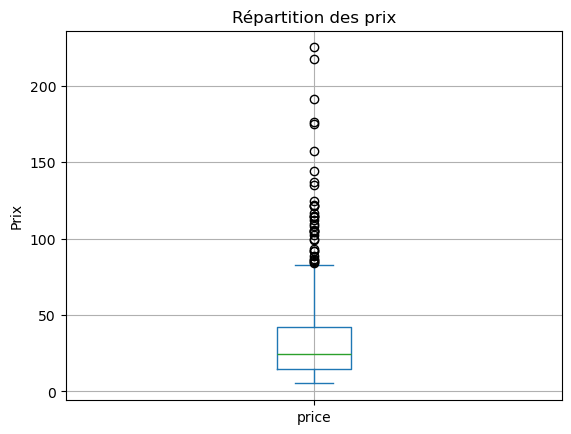

In [273]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
import matplotlib.pyplot as plt

df_final['price'].plot.box()
plt.title("Répartition des prix")
plt.ylabel("Prix")
plt.grid(True)
plt.show()

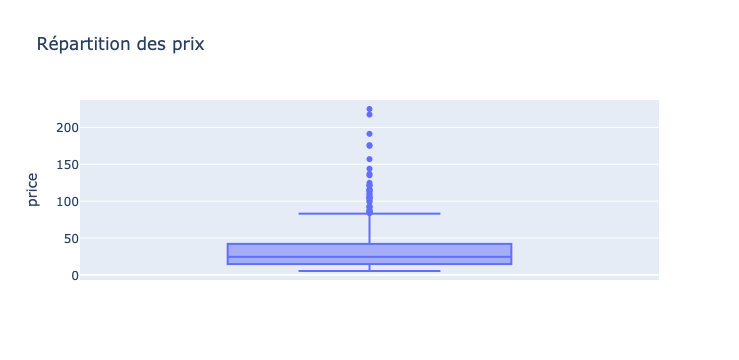

In [275]:
#Autre méthode avec plotly express
import plotly.express as px
fig = px.box(df_final, y="price", title="Répartition des prix")
fig.show()

<p> Ce que cela révèle :
	•	Asymétrie forte → Il y a une majorité de produits dans une gamme abordable, mais une minorité à prix très élevé.
	•	Longue traîne vers le haut → Présence de produits premium ou haut de gamme qui peuvent fortement influencer la moyenne.
	•	Le marché semble dominant en entrée/milieu de gamme, mais avec une ouverture vers le luxe.</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [583]:
#Calculer la moyenne du prix
mean_price = df_final["price"].mean()
mean_price = round (mean_price, 2)
print(f"La valeur de la moyenne des prix est : {mean_price} ")


#Calculer l'écart-type du prix
std_price = df_final["price"].std()
std_price = round (std_price, 2)
print(f"La valeur de l'ecart type du prix est : {std_price} ")


#Calculer le Z-score

z_score = (df_final["price"] - df_final["price"].mean()) / df_final["price"].std()
print(f" Le Z-score du prix est :") 
print(z_score)

La valeur de la moyenne des prix est : 32.35 
La valeur de l'ecart type du prix est : 26.62 
 Le Z-score du prix est :
0      7.236362
1      5.970513
2      1.771050
3      0.332415
4      3.104511
         ...   
819   -0.569080
820   -0.189701
821    0.569057
822   -0.835772
823    0.475151
Name: price, Length: 824, dtype: float64


In [282]:
#Quel est le seuil prix dont z-score est supérieur à 3?
_z3 = mean_price + 3 * std_price
seuil_z3 = round(_z3,2)
print(f"Seuil de prix pour un z-score > 3 :", seuil_z3)

Seuil de prix pour un z-score > 3 : 112.21


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [285]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_final.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,stock_quantity_corrigé,total_sales
count,822.000000,822.000000,822.000000,822.000000,822.000000,822.000000,716.000000
mean,5162.164234,0.871046,32.350304,21.644769,16.978954,21.658151,7.930168
std,902.313894,0.335353,26.622453,21.947736,14.573563,21.931711,4.885616
min,3847.000000,0.000000,5.200000,-10.000000,2.740000,0.000000,-56.000000
25%,4348.500000,1.000000,14.600000,7.000000,7.627500,7.000000,5.000000
50%,4905.500000,1.000000,24.400000,18.000000,12.740000,18.000000,8.000000
75%,5804.750000,1.000000,42.000000,30.000000,22.027500,30.000000,11.000000
max,7338.000000,1.000000,225.000000,145.000000,137.810000,145.000000,36.000000


In [585]:
#Définissez un seuil pour les articles "outliers" en prix

# Calcul de l'ecart Interqurtile 
Q1 = df_final['price'].quantile(0.25)
Q3 =df_final['price'].quantile(0.75)
Q2 =df_final['price'].quantile(0.50)
IQR = Q3 - Q1

# Définition des bornes
seuil_bas = Q1 - 1.5 * IQR
seuil_haut = Q3 + 1.5 * IQR

# Affichage des seuils
print("Seuil bas :", seuil_bas)
print("Seuil haut :", seuil_haut)

# Filtrer les outliers
outliers = df_final[(df_final['price'] < seuil_bas) | (df_final['price'] > seuil_haut)]

outliers.head(5)

print(Q3)
print(Q2)
print(Q1)
print(IQR)

Seuil bas : -26.499999999999993
Seuil haut : 83.1
42.0
24.4
14.6
27.4


In [289]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

outliers.count()


product_id                36
onsale_web                36
price                     36
stock_quantity            36
stock_status              36
purchase_price            36
stock_quantity_corrigé    36
sku                       32
total_sales               32
product_type              32
post_title                32
post_excerpt              32
post_type                 32
_merge                    36
dtype: int64

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [293]:
##############################
# Calculer le CA du site web #
##############################

#Créez une colonne calculant le CA par article

df_final["ca_par_article"] = df_final["price"] * df_final["total_sales"]
df_final


#Calculez la somme de la colonne "ca_par_article"


ca_total = df_final["ca_par_article"].sum()
ca_col_total = round (ca_total , 2)

print (f" le chiffre d'affaire total est de {ca_total} euros ")


#Ce résultat correspond au chiffre d'affaire du site web
df_final

 le chiffre d'affaire total est de 143680.1 euros 


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_quantity_corrigé,sku,total_sales,product_type,post_title,post_excerpt,post_type,_merge,ca_par_article
0,4729.0,1.0,8.6,26.0,instock,4.22,26.0,38,10.0,Vin,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",product,both,86.0
1,4634.0,1.0,41.0,11.0,instock,20.12,11.0,41,6.0,Vin,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,product,both,246.0
2,4141.0,1.0,39.0,123.0,instock,24.86,123.0,304,8.0,Champagne,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",product,both,312.0
3,5932.0,1.0,59.9,13.0,instock,27.18,13.0,523,0.0,Cognac,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,product,both,0.0
4,5047.0,1.0,22.5,76.0,instock,13.78,76.0,531,8.0,Champagne,Champagne Petit Lebrun &amp; Fils Blanc de Bla...,Cuvée bien équilibrée à la fois vive et souple...,product,both,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,7196.0,0.0,31.0,55.0,instock,31.20,55.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
820,7200.0,0.0,31.0,6.0,instock,15.54,6.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
821,7201.0,0.0,31.0,18.0,instock,16.02,18.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN
822,7203.0,0.0,45.0,30.0,instock,23.48,30.0,NaN,NaN,NaN,NaN,NaN,NaN,left_only,NaN


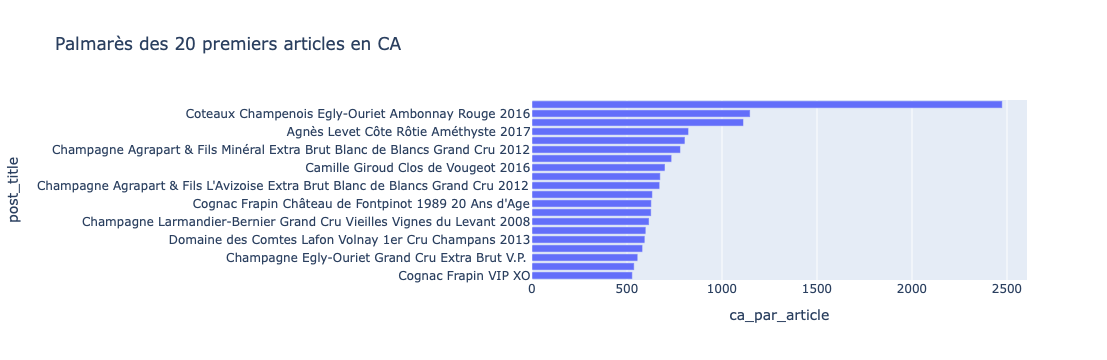

In [353]:
###############################
# Palmares des articles en CA #
###############################


# Trier dans l'ordre décroissant
df_final = df_final.sort_values(by='ca_par_article', ascending=False)

# Réinitialiser l'index
df_final.reset_index(drop=True, inplace=True)

# Afficher les 20 premiers
df_final.head(20)

# Afficher un graphique avec Plotly
fig = px.bar(
    data_frame=df_final.head(20)[::-1],  # 20 premiers triés inversés pour l'affichage
    y="post_title", 
    x="ca_par_article", 
    orientation="h", 
    title="Palmarès des 20 premiers articles en CA"
)
fig.show()

In [560]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset

df_final['%_du_ca'] = df_final['ca_par_article'] / df_final['ca_par_article'].sum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_final['cumul_%_du_ca'] = df_final['%_du_ca'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
seuil_80 = df_final[df_final['cumul_%_du_ca'] <= 0.8]
nb_articles_80 = seuil_80.shape[0]
print(f"Nombre d'articles représentant 80% du CA : {nb_articles_80}")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web

proportion_catalogue = nb_articles_80 / df_final.shape[0]
print(f"Ces articles représentent {proportion_catalogue:.2%} du catalogue total.")

Nombre d'articles représentant 80% du CA : 434
Ces articles représentent 52.67% du catalogue total.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

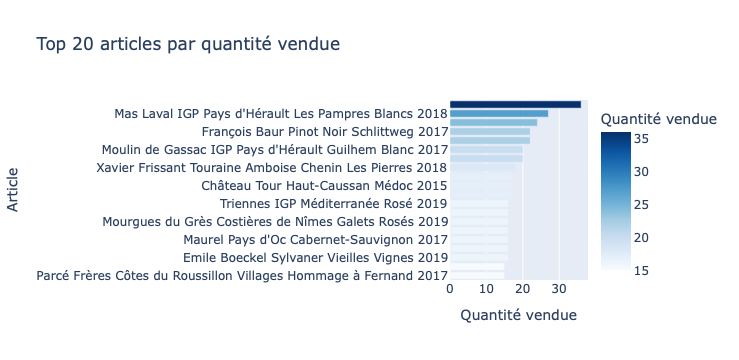

In [302]:
#####################################
# Palmares d''es articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

df_final = df_final.sort_values(by='total_sales', ascending=False)


#Réinitialiser l'index du dataset par un reset_index
df_final.reset_index(drop=True, inplace=True)

#Afficher les 20 premier articles en quantité
df_final.head(20)



#Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(
    df_final.head(20),
    x='total_sales',
    y='post_title',
    orientation='h',
    title='Top 20 articles par quantité vendue',
    labels={'total_sales': 'Quantité vendue', 'post_title': 'Article'},
    color='total_sales',
    color_continuous_scale='Blues'
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [304]:
#############################
# Calculer le 20 / 80 en CA #
#############################



#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_final['%_des_ventes'] = df_final['total_sales'] / df_final['total_sales'].sum()

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

df_final['cumul_%_des_ventes'] = df_final['%_des_ventes'].cumsum()

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
nb_articles_80pct_ventes = (df_final['cumul_%_des_ventes'] <= 0.80).sum()

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
part_dans_catalogue = nb_articles_80pct_ventes / len(df_final)
print(f"{nb_articles_80pct_ventes} articles représentent 80% des ventes en quantité.")
print(f"Ils représentent {part_dans_catalogue:.2%} du catalogue total.")


424 articles représentent 80% des ventes en quantité.
Ils représentent 51.46% du catalogue total.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

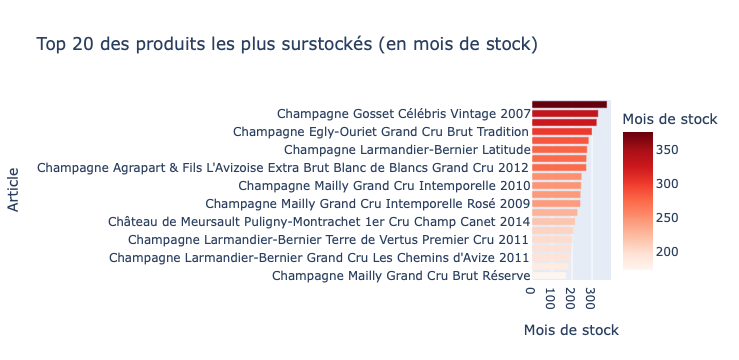

In [307]:
######################################
# Calcule le nombre de mois de stock #
######################################


#Création de la colonne Rotation de stock
df_final['mois_de_stock'] = df_final['stock_quantity_corrigé'] / ((df_final['total_sales'] / 12))

#Remplacement des "inf" par 0
df_final['mois_de_stock'].replace([np.inf, -np.inf], 0, inplace=True)
df_final['mois_de_stock'].fillna(0, inplace=True)

#Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge
df_final = df_final.sort_values(by='mois_de_stock', ascending=False).reset_index(drop=True)

#Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

fig = px.bar(
    df_final.head(20),
    x='mois_de_stock',
    y='post_title',  # ou le nom correct de la colonne produit
    orientation='h',
    title='Top 20 des produits les plus surstockés (en mois de stock)',
    labels={'mois_de_stock': 'Mois de stock', 'post_title': 'Article'},
    color='mois_de_stock',
    color_continuous_scale='Reds'
)

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

In [309]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_final['valorisation_stock_euros'] = df_final['stock_quantity_corrigé'] * df_final['purchase_price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
total_valorisation = df_final['valorisation_stock_euros'].sum()
print(f"Valorisation totale des stocks : {total_valorisation:,.2f} €")

Valorisation totale des stocks : 298,540.07 €


In [311]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity

total_stock = df_final['stock_quantity'].sum()
print(f"Quantité totale en stock : {total_stock}")

Quantité totale en stock : 17792.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [562]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT

df_final['prix_HT'] = df_final['price'] / (1.20)

#Création de la colonne Taux de marge
df_final['taux_marge'] = (df_final['price'] - df_final['purchase_price']) / df_final['purchase_price']


#Afficher le prix minimum de la colonne "taux_marge"
min_marge = df_final['taux_marge'].min()
print(f"Taux de marge minimum : {min_marge:.2%}")

#Afficher le prix maximum de la colonne "taux_marge"
max_marge =df_final['taux_marge'].max()
print(f"Taux de marge maximum : {max_marge:.2%}")


Taux de marge minimum : -83.67%
Taux de marge maximum : 129.69%


In [546]:
#affichage de la ligne avec un taux de marge inférieur à 0
df_final[df_final['taux_marge'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_quantity_corrigé,sku,total_sales,product_type,...,_merge,ca_par_article,%_du_ca,cumul_%_du_ca,%_des_ventes,cumul_%_des_ventes,mois_de_stock,valorisation_stock_euros,prix_HT,taux_marge
702,4355.0,1.0,12.65,97.0,instock,77.48,97.0,12589,0.0,Champagne,...,both,0.0,0.0,1.0,0.0,1.012857,0.0,7515.56,10.541667,-83.673206
719,6324.0,0.0,92.00,18.0,instock,99.00,18.0,NaN,NaN,NaN,...,left_only,NaN,NaN,NaN,NaN,NaN,0.0,1782.00,76.666667,-7.070707
772,7196.0,0.0,31.00,55.0,instock,31.20,55.0,NaN,NaN,NaN,...,left_only,NaN,NaN,NaN,NaN,NaN,0.0,1716.00,25.833333,-0.641026
797,4864.0,0.0,8.30,0.0,outofstock,9.99,0.0,15154,NaN,NaN,...,left_only,NaN,NaN,NaN,NaN,NaN,0.0,0.00,6.916667,-16.916917


In [564]:
#création d'un dataframe avec les taux positifs
df_final_positif = df_final[df_final['taux_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
min_marge = df_final_positif['taux_marge'].min()
print(f"Taux de marge minimum : {min_marge:.2%}")

#Afficher le prix maximum de la colonne "taux_marge"
max_marge =df_final_positif['taux_marge'].max()
print(f"Taux de marge maximum : {max_marge:.2%}")

Taux de marge minimum : 55.40%
Taux de marge maximum : 129.69%


In [566]:
# Calcul du taux de marge moyen par type de produit
marge_moyenne_par_type = df_final_positif.groupby('product_type')['taux_marge'].mean().reset_index()

# Conversion du taux en pourcentage
marge_moyenne_par_type['taux_marge'] = (marge_moyenne_par_type['taux_marge'] * 100).round(2)

# Renommer la colonne pour plus de clarté (optionnel)
marge_moyenne_par_type.rename(columns={'taux_marge': 'taux_marge_%'}, inplace=True)
df_final_positif.rename(columns={'taux_marge': 'taux_marge_%'}, inplace=True)

# Affichage du DataFrame
print(marge_moyenne_par_type)

    product_type  taux_marge_%
0      Champagne         67.95
1         Cognac        118.78
2            Gin        109.79
3  Huile d'olive         60.07
4            Vin         93.80
5         Whisky        118.09


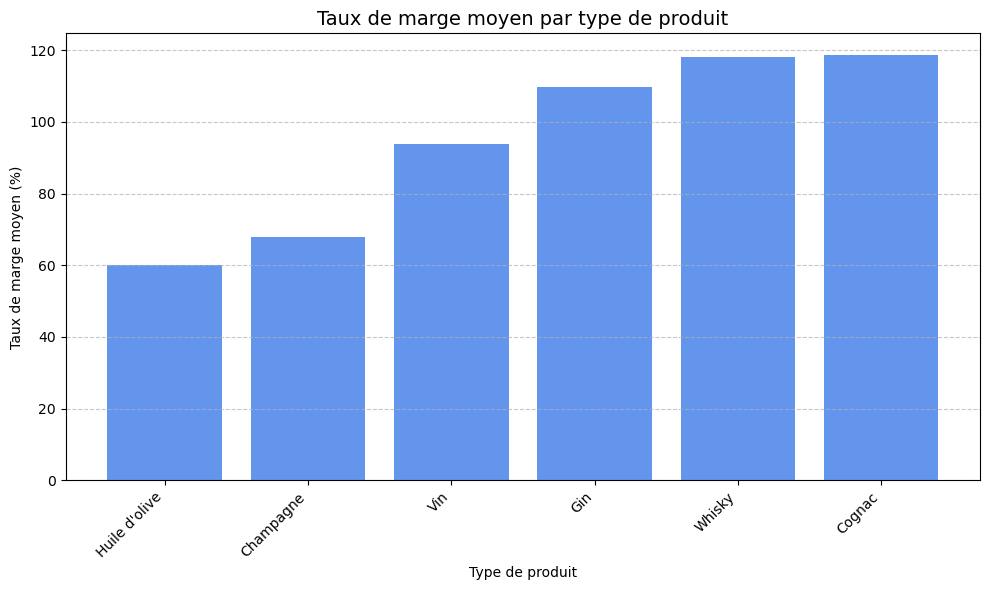

In [568]:
#Affichage dans un graphique du taux de marge par type de produit

marge_moyenne_par_type_sorted = marge_moyenne_par_type.sort_values(by='taux_marge_%', ascending=True)

plt.figure(figsize=(10, 6))
plt.bar(
    marge_moyenne_par_type_sorted['product_type'], 
    marge_moyenne_par_type_sorted['taux_marge_%'], 
    color='cornflowerblue'
)
plt.title("Taux de marge moyen par type de produit", fontsize=14)
plt.xlabel("Type de produit")
plt.ylabel("Taux de marge moyen (%)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p> 	1.	✅ Les spiritueux (Cognac, Whisky, Gin) sont les produits les plus rentables. Il peut être judicieux d’en renforcer la promotion ou les stocks.</p>

<p> 	2.	⚠️ Huile d’olive et Champagne ont une marge relativement faible. Cela peut indiquer :
	•	Des coûts d’achat élevés.
	•	Une fixation des prix de vente trop basse.
	•	Une faible valeur ajoutée ou concurrence accrue.
	•	Il faudrait analyser la structure de coûts ou revoir les stratégies tarifaires.</p>

<p> 3.	🔄 Le vin est intermédiaire : rentable mais peut être optimisé.</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

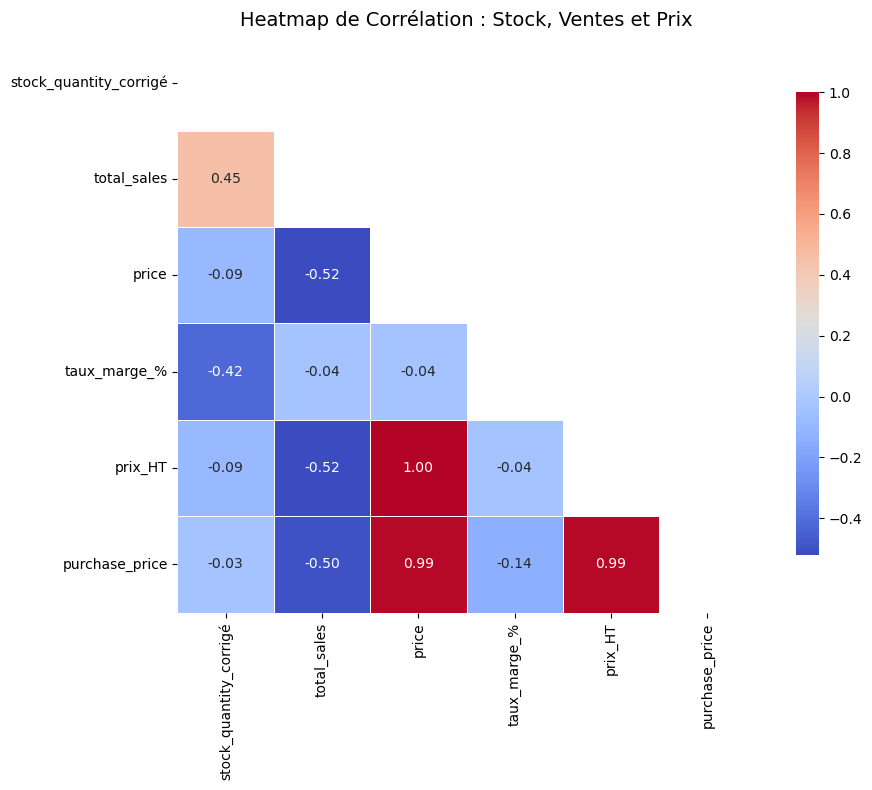

In [574]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn

import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
variables_corr = df_final_positif[['stock_quantity_corrigé','total_sales', 'price','taux_marge_%', 'prix_HT', 'purchase_price']]
correlation_matrix = variables_corr.corr()

#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Heatmap de Corrélation : Stock, Ventes et Prix", fontsize=14)
plt.tight_layout()
plt.show()

In [450]:
#Que peut-on conclure des correlations ?

<p> Points Clés / Aperçus :

Il existe une forte relation positive entre les différentes mesures de prix (price, prix_HT, purchase_price). price et prix_HT semblent être presque identiques.

Les ventes totales montrent une corrélation négative modérée avec le price et le prix_HT, ce qui est une relation économique courante (des prix plus bas peuvent générer des volumes de ventes plus élevés).

Une stock_quantity plus élevée semble être associée à des total_sales plus élevées mais à un taux_marge_% plus faible. Cela pourrait impliquer que des stocks importants pourraient entraîner des promotions ou des remises pour écouler les stocks, affectant ainsi les marges.

Le taux de marge (taux_marge_%) ne semble pas avoir de fortes relations linéaires avec la plupart des autres variables, à l'exception d'une corrélation négative modérée avec stock_quantity.

Ce heatmap fournit un bon résumé visuel des relations linéaires entre ces métriques commerciales clés. Pour une analyse plus approfondie, on pourrait envisager les relations non linéaires, la causalité et les aspects de séries chronologiques si les données le permettent.
</p>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [336]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  

df_final_positif.to_excel("df_merge_resultat.xlsx", index=False)

print("Le fichier Excel 'df_merge_resultat.xlsx' a été créé avec succès.")

Le fichier Excel 'df_merge_resultat.xlsx' a été créé avec succès.
